# Projet n°1

In [3]:
#Import des librairies du projet
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
import seaborn as sns


Using TensorFlow backend.


## 1) Développement d'un perceptron
### 1.1) Mise en place d'un perceptron simple

Test du perceptron avec OR logique:
Entrée: [0 0], Sortie attendue: 0, Sortie du perceptron: -1.0
Entrée: [0 1], Sortie attendue: 1, Sortie du perceptron: 1.0
Entrée: [1 0], Sortie attendue: 1, Sortie du perceptron: 1.0
Entrée: [1 1], Sortie attendue: 1, Sortie du perceptron: 1.0


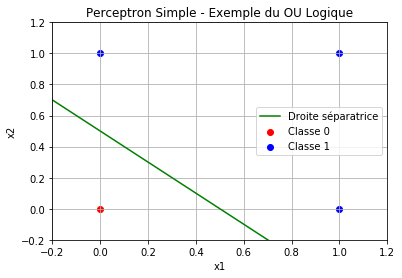

In [8]:
def perceptron_simple(x, w, active):
    # Calcul de la somme pondérée (y_net)
    y_net = w[0] + w[1] * x[0] + w[2] * x[1]
    
    # Application de la fonction d'activation
    if active == 0:  # Fonction d'activation sign
        y = np.sign(y_net)
    elif active == 1:  # Fonction d'activation tanh
        y = np.tanh(y_net)
    
    return y

# Ensemble de données du OU logique
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

# Poids du perceptron (biais, w1, w2)
w = np.array([-0.5, 1, 1])

# Test du perceptron
print("Test du perceptron avec OR logique:")
for i, x in enumerate(data):
    y = perceptron_simple(x, w, active=0)
    print(f"Entrée: {x}, Sortie attendue: {labels[i]}, Sortie du perceptron: {y}")

# Tracer les points de l'ensemble d'apprentissage
for i in range(len(data)):
    if labels[i] == 0:
        plt.scatter(data[i, 0], data[i, 1], color='red', label='Classe 0' if i == 0 else "")
    else:
        plt.scatter(data[i, 0], data[i, 1], color='blue', label='Classe 1' if i == 1 else "")

# Calcul de la droite séparatrice
x_vals = np.linspace(-0.2, 1.2, 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]

# Tracer la droite séparatrice
plt.plot(x_vals, y_vals, label="Droite séparatrice", color='green')

# Ajouter des labels
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Simple - Exemple du OU Logique")
plt.legend()
plt.grid(True)
plt.show()

### 1.2) Etude de l'apprentissage
#### 1.2.1) Programmation apprentissage Widrow-hoff

In [133]:
def apprentissage_widrow(x, yd, epoch, batch_size):
    a, b, c = 0, 0, 0
    alpha = 0.1

    # Initialisation des poids avec des valeurs aléatoires non nulles
    while a == 0:
        a = round(random.uniform(-1, 1), 1)
    while b == 0:
        b = round(random.uniform(-1, 1), 1)
    while c == 0:
        c = round(random.uniform(-1, 1), 1)

    poids = [a, b, c]
    t = [-3, 3]

    # Première droite avant entraînement
    u = -(poids[0] / poids[2]) / (poids[0] / poids[1])
    v = -poids[0] / poids[2]
    z = [u * t[0] + v, u * t[1] + v]

    plt.figure()
    plt.scatter(x[0], x[1])
    plt.plot(t, z, label='Avant entraînement')

    history = []

    for i in range(epoch):
        erreur = 0

        # Mise à jour des poids et calcul de l'erreur
        for j in range(x[0].size):
            x_cal = perceptron_simple(x[:, j], poids, 1)
            r = yd[j] - x_cal

            erreur += r
            phi = 1 - (x_cal * x_cal)
            a += alpha * (-r) * 1 * phi
            b += alpha * (-r) * x[:, j][0] * phi
            c += alpha * (-r) * x[:, j][1] * phi

            poids = [a, b, c]

        history.append(erreur)

        # Calcul de la nouvelle droite
        u = -(poids[0] / poids[2]) / (poids[0] / poids[1])
        v = -poids[0] / poids[2]
        z = [u * t[0] + v, u * t[1] + v]

        # Visualisation de l'évolution de la droite
        if i < 4:
            l = 'Epoch ' + str(i + 1)
            plt.plot(t, z, label=l)
        elif i == epoch - 1:
            l = 'Dernière Epoch'
            plt.plot(t, z, label=l, color='black')
            plt.legend()
            plt.ylim(-5, 5)

            # Couleurs des points en fonction de leur position par rapport à la droite finale
            for j in range(x[0].size):
                y_line = u * x[0][j] + v  # Calcul de la droite à la position x[0][j]
                if x[1][j] > y_line:
                    plt.scatter(x[0][j], x[1][j], color='blue')  # Points au-dessus de la droite
                else:
                    plt.scatter(x[0][j], x[1][j], color='red')  # Points en dessous de la droite

    plt.show()

    # Affichage de la courbe d'évolution de l'erreur
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epoch + 1), history, marker='o')
    plt.title("Évolution de l'erreur au fil des epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Erreur quadratique totale")
    plt.grid(True)
    plt.show()
    
    return poids, erreur

#### Test 1 simple

In [130]:
# Chargement des données p2_d1.txt
data= np.loadtxt('C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\p2_d1.txt')

yd = []

for i in range(25):
    yd.append(1)
    
for i in range(25):
    yd.append(-1)

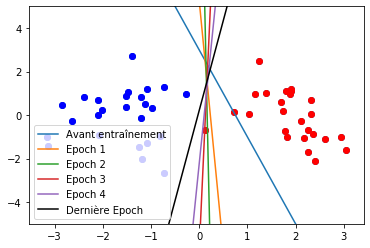

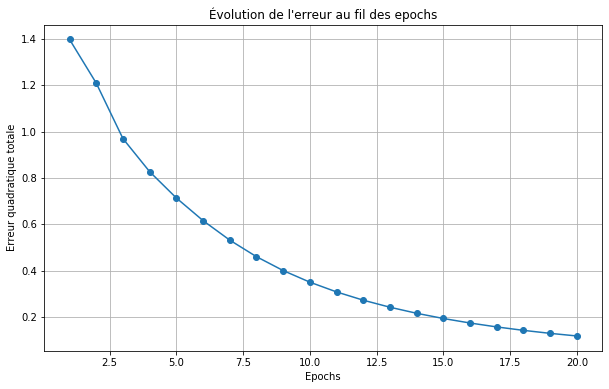

([0.09552037903247824, 3.8303149663976, -0.4629858570174852],
 0.11707039695263743)

In [134]:
apprentissage_widrow(data,yd,20,5)

In [135]:
data2= np.loadtxt('C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\p2_d2.txt')



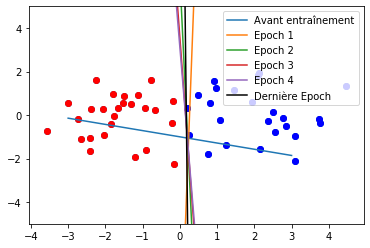

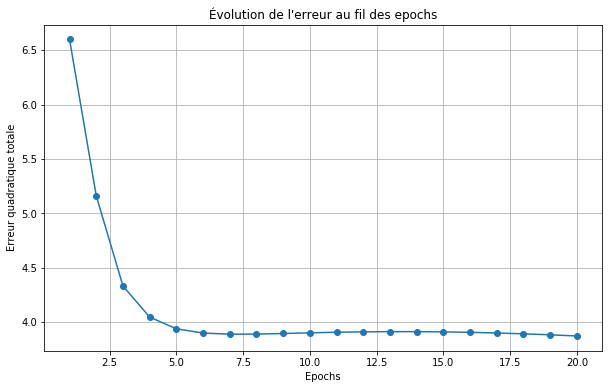

([-0.735900750451272, 4.23783969641076, 0.029053457925864147],
 3.873499309428901)

In [137]:
apprentissage_widrow(data2,yd,20,5)

In [138]:

# Définition de la fonction d'activation (sigmoïde)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Définition du perceptron multicouche
def multiperceptron(x, w1, w2):
    # Ajout d'un biais à l'entrée pour la couche cachée
    x = np.append(1, x)  # Ajout d'une entrée pour le biais (x0 = 1)
    
    # Calcul des activations pour la couche cachée
    h1 = sigmoid(np.dot(x, w1[:, 0]))  # Neurone 1 de la couche cachée
    h2 = sigmoid(np.dot(x, w1[:, 1]))  # Neurone 2 de la couche cachée
    
    # Ajout d'un biais à la sortie de la couche cachée
    hidden_output = np.append(1, [h1, h2])  # Ajout d'un biais à la sortie de la couche cachée
    
    # Calcul de la sortie finale avec la couche de sortie (avec biais)
    y = sigmoid(np.dot(hidden_output, w2))
    
    return y

# Exemples des poids et de l'entrée
# Matrice w1 : 3 lignes (2 entrées + biais), 2 colonnes (2 neurones)
w1 = np.array([[-0.5, 0.5],  # Poids du biais pour chaque neurone caché
               [2, 1],     # Poids de x1 pour chaque neurone caché
               [-1, 0.5]]) # Poids de x2 pour chaque neurone caché

# Vecteur w2 : 3 lignes (poids pour chaque neurone de la couche cachée + biais)
w2 = np.array([2, -1, 1])  # Poids associés aux sorties des neurones cachés + biais

# Entrée x (sans le biais)
x = np.array([1, 1])  # Entrée [x1, x2]

# Calcul de la sortie du réseau
y = multiperceptron(x, w1, w2)

# Affichage du résultat
print("La sortie du réseau est :", round(y,2))

La sortie du réseau est : 0.91


## 2) Deep et Full-connected : discrimination d'une image

### 2.1) Approche basée Descripteurs

#### 2.1.1) Calcul des descripteurs

In [4]:
# Import des descripteurs dans des dataframes
df_phog = pd.read_excel("C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\transfert\\WangSignatures.xlsx", sheet_name="WangSignaturesPHOG",header=None)
df_jcd = pd.read_excel("C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\transfert\\WangSignatures.xlsx", sheet_name="WangSignaturesJCD",header=None)
df_cedd = pd.read_excel("C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\transfert\\WangSignatures.xlsx", sheet_name="WangSignaturesCEDD",header=None)
df_fcth = pd.read_excel("C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\transfert\\WangSignatures.xlsx", sheet_name="WangSignaturesFCTH",header=None)
df_fuzzy_color = pd.read_excel("C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\transfert\\WangSignatures.xlsx", sheet_name="WangSignaturesFuzzyColorHistogr",header=None)

# Liste des labels
image_type=['Jungle','Plage','Monuments','Bus','Dinosaures','Eléphants','Fleurs','Chevaux','Montagne','Plats']

# Liste de tous les dataframes
dfs=[df_phog,df_jcd,df_cedd,df_fcth,df_fuzzy_color]



In [5]:
def get_label_from_first_col(value):
    # Supprimer les 4 derniers caractères
    num_str = str(value)[:-4]
    # Diviser par 100 et prendre la partie entière
    index = int(num_str) // 100
    # Retourner le label correspondant
    return image_type[index]

# Appliquer cette fonction à la première colonne pour créer une nouvelle colonne de labels
for df in dfs:
    df['label'] = df.iloc[:, 0].apply(get_label_from_first_col)

# Affichage du DataFrame avec la nouvelle colonne
df_fuzzy_color.head()

image_type[1]


'Plage'

#### 2.1.2) Mise en place d'un système de discrimination basée structure Full-Connected

Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 237us/step - loss: 2.8567 - accuracy: 0.1234 - val_loss: 2.3532 - val_accuracy: 0.1063
Epoch 2/50
640/640 [==============================] - 0s 56us/step - loss: 2.2993 - accuracy: 0.1125 - val_loss: 2.3039 - val_accuracy: 0.0812
Epoch 3/50
640/640 [==============================] - 0s 46us/step - loss: 2.2402 - accuracy: 0.1516 - val_loss: 2.2638 - val_accuracy: 0.1500
Epoch 4/50
640/640 [==============================] - 0s 46us/step - loss: 2.1651 - accuracy: 0.2031 - val_loss: 2.1451 - val_accuracy: 0.2313
Epoch 5/50
640/640 [==============================] - 0s 36us/step - loss: 2.0753 - accuracy: 0.2531 - val_loss: 2.1093 - val_accuracy: 0.2375
Epoch 6/50
640/640 [==============================] - 0s 36us/step - loss: 1.9806 - accuracy: 0.2922 - val_loss: 1.9978 - val_accuracy: 0.2812
Epoch 7/50
640/640 [==============================] - 0s 52us/step - loss: 1.8787 - accuracy: 0

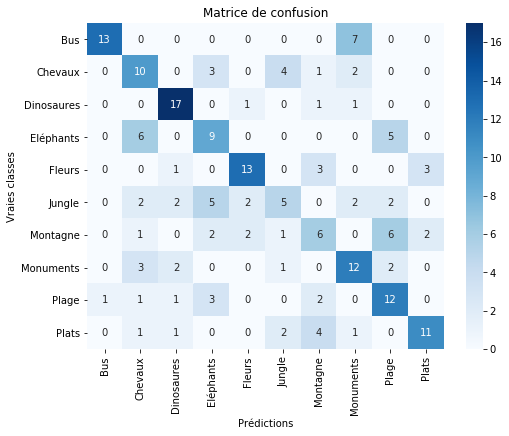

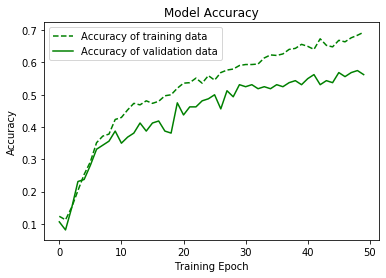

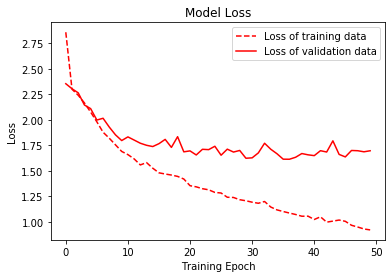

[1.6085364365577697, 0.5400000214576721]
Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 114us/step - loss: 2.4288 - accuracy: 0.1172 - val_loss: 2.2619 - val_accuracy: 0.1437
Epoch 2/50
640/640 [==============================] - 0s 50us/step - loss: 2.1330 - accuracy: 0.1906 - val_loss: 2.0019 - val_accuracy: 0.2875
Epoch 3/50
640/640 [==============================] - 0s 34us/step - loss: 1.9279 - accuracy: 0.2953 - val_loss: 1.8258 - val_accuracy: 0.4062
Epoch 4/50
640/640 [==============================] - 0s 41us/step - loss: 1.7496 - accuracy: 0.4094 - val_loss: 1.6776 - val_accuracy: 0.4437
Epoch 5/50
640/640 [==============================] - 0s 37us/step - loss: 1.5856 - accuracy: 0.4859 - val_loss: 1.5375 - val_accuracy: 0.5375
Epoch 6/50
640/640 [==============================] - 0s 26us/step - loss: 1.4373 - accuracy: 0.5422 - val_loss: 1.4087 - val_accuracy: 0.5750
Epoch 7/50
640/640 [==============================] - 

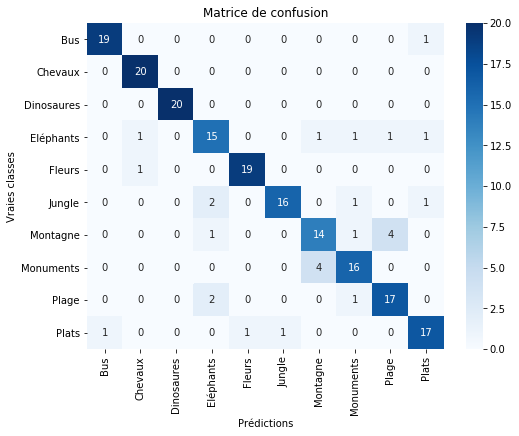

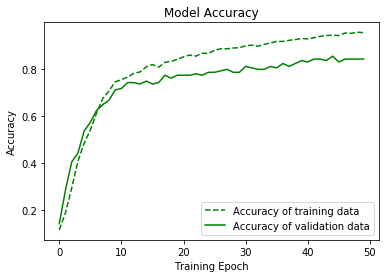

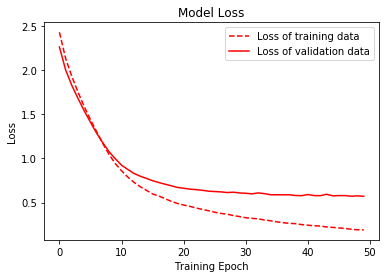

[0.4372592169046402, 0.8650000095367432]
Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 130us/step - loss: 2.2987 - accuracy: 0.1781 - val_loss: 2.1514 - val_accuracy: 0.2188
Epoch 2/50
640/640 [==============================] - 0s 36us/step - loss: 2.1183 - accuracy: 0.2328 - val_loss: 2.0228 - val_accuracy: 0.2500
Epoch 3/50
640/640 [==============================] - 0s 37us/step - loss: 1.9823 - accuracy: 0.2656 - val_loss: 1.8873 - val_accuracy: 0.2625
Epoch 4/50
640/640 [==============================] - 0s 34us/step - loss: 1.8407 - accuracy: 0.3016 - val_loss: 1.7720 - val_accuracy: 0.3125
Epoch 5/50
640/640 [==============================] - 0s 42us/step - loss: 1.7085 - accuracy: 0.3922 - val_loss: 1.6669 - val_accuracy: 0.3812
Epoch 6/50
640/640 [==============================] - 0s 36us/step - loss: 1.5916 - accuracy: 0.4406 - val_loss: 1.5752 - val_accuracy: 0.4187
Epoch 7/50
640/640 [==============================] - 

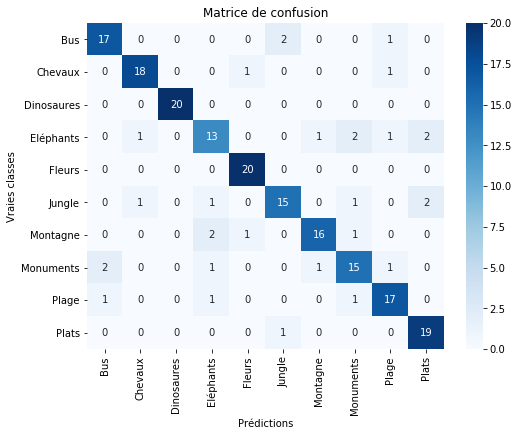

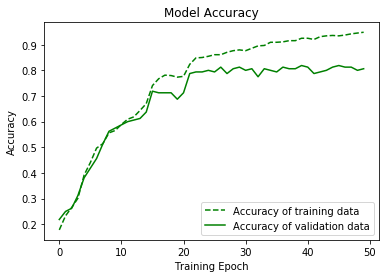

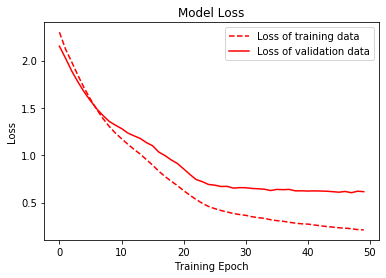

[0.4668779766559601, 0.8500000238418579]
Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 167us/step - loss: 2.3513 - accuracy: 0.1609 - val_loss: 2.1923 - val_accuracy: 0.2188
Epoch 2/50
640/640 [==============================] - 0s 52us/step - loss: 2.1066 - accuracy: 0.2484 - val_loss: 2.0363 - val_accuracy: 0.2937
Epoch 3/50
640/640 [==============================] - 0s 52us/step - loss: 1.9766 - accuracy: 0.2750 - val_loss: 1.9169 - val_accuracy: 0.3375
Epoch 4/50
640/640 [==============================] - 0s 43us/step - loss: 1.8648 - accuracy: 0.3281 - val_loss: 1.8097 - val_accuracy: 0.3688
Epoch 5/50
640/640 [==============================] - 0s 39us/step - loss: 1.7546 - accuracy: 0.3859 - val_loss: 1.6959 - val_accuracy: 0.4375
Epoch 6/50
640/640 [==============================] - 0s 41us/step - loss: 1.6488 - accuracy: 0.4328 - val_loss: 1.5945 - val_accuracy: 0.4437
Epoch 7/50
640/640 [==============================] - 

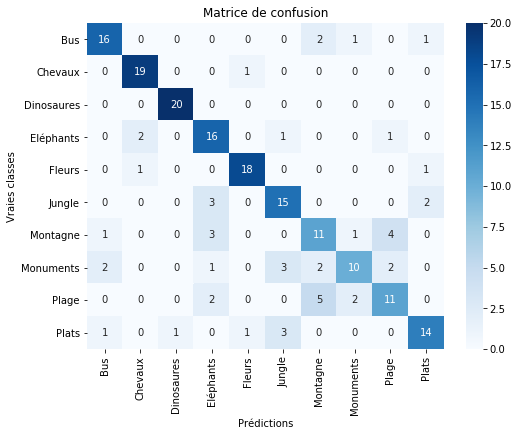

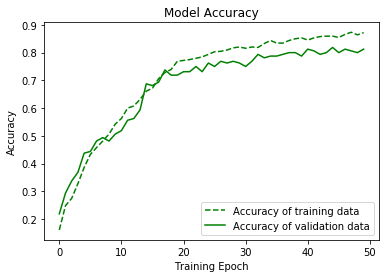

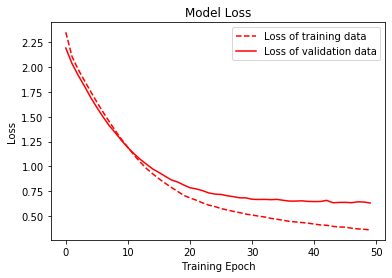

[0.6098582124710084, 0.75]
Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 154us/step - loss: 17.8902 - accuracy: 0.0812 - val_loss: 2.7967 - val_accuracy: 0.0312
Epoch 2/50
640/640 [==============================] - 0s 27us/step - loss: 2.5074 - accuracy: 0.0297 - val_loss: 2.6450 - val_accuracy: 0.0688
Epoch 3/50
640/640 [==============================] - 0s 60us/step - loss: 2.3639 - accuracy: 0.0906 - val_loss: 2.4145 - val_accuracy: 0.0688
Epoch 4/50
640/640 [==============================] - 0s 33us/step - loss: 2.2992 - accuracy: 0.1187 - val_loss: 2.4463 - val_accuracy: 0.0688
Epoch 5/50
640/640 [==============================] - 0s 39us/step - loss: 2.2893 - accuracy: 0.1187 - val_loss: 2.4212 - val_accuracy: 0.0688
Epoch 6/50
640/640 [==============================] - 0s 39us/step - loss: 2.2866 - accuracy: 0.1156 - val_loss: 2.4314 - val_accuracy: 0.0688
Epoch 7/50
640/640 [==============================] - 0s 37us/step 

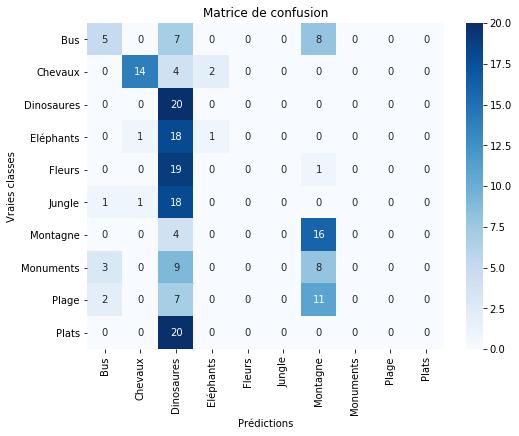

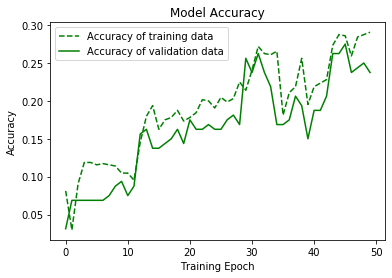

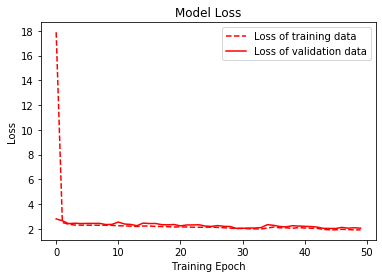

[1.9427322578430175, 0.2800000011920929]


In [6]:
num_class = 10

for df in dfs:
    X = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]
    
    # Encoder les étiquettes 
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,stratify=y_encoded)

    model = Sequential([
        Dense(16,activation='relu',input_shape=[X_train.shape[1]]),
        Dense(8,activation='relu'),
        Dense(num_class,activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit(X_train,to_categorical(y_train),epochs=50,batch_size=32,validation_split=0.2,verbose=1)

    score = model.evaluate(X_test, to_categorical(y_test), verbose=1)

    # Prédire les classes sur l'ensemble de test
    y_pred = model.predict(X_test)

   

    # Convertir les probabilités en classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Afficher la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Vraies classes')
    plt.xlabel('Prédictions')
    plt.title('Matrice de confusion')
    plt.show()
    
    # Évolution de la précision
    plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data") 
    plt.plot(history.history['val_accuracy'], "g", label="Accuracy of validation data") 
    plt.title('Model Accuracy') 
    plt.ylabel('Accuracy')
    plt.xlabel('Training Epoch')
    plt.legend()
    plt.show()
    
    # Évolution de la loss
    plt.plot(history.history['loss'], "r--", label="Loss of training data") 
    plt.plot(history.history['val_loss'], "r", label="Loss of validation data") 
    plt.title('Model Loss') 
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.legend()
    plt.show()

    print(score)

#### Modification de la strcture pour le descripteur Fuzzy color

Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 0s 255us/step - loss: 27.5302 - accuracy: 0.2609 - val_loss: 12.2437 - val_accuracy: 0.3875
Epoch 2/50
640/640 [==============================] - 0s 54us/step - loss: 9.0690 - accuracy: 0.4266 - val_loss: 5.5349 - val_accuracy: 0.4625
Epoch 3/50
640/640 [==============================] - 0s 57us/step - loss: 4.7298 - accuracy: 0.4984 - val_loss: 4.1592 - val_accuracy: 0.4688
Epoch 4/50
640/640 [==============================] - 0s 58us/step - loss: 3.7164 - accuracy: 0.5344 - val_loss: 4.4515 - val_accuracy: 0.5188
Epoch 5/50
640/640 [==============================] - 0s 56us/step - loss: 3.6046 - accuracy: 0.5734 - val_loss: 3.0701 - val_accuracy: 0.5063
Epoch 6/50
640/640 [==============================] - 0s 64us/step - loss: 2.9112 - accuracy: 0.6203 - val_loss: 2.5090 - val_accuracy: 0.6375
Epoch 7/50
640/640 [==============================] - 0s 60us/step - loss: 3.1991 - accuracy:

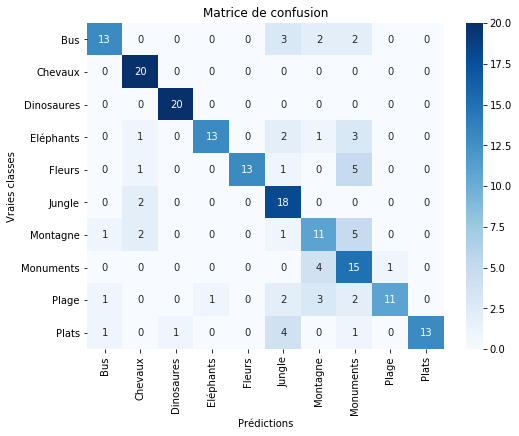

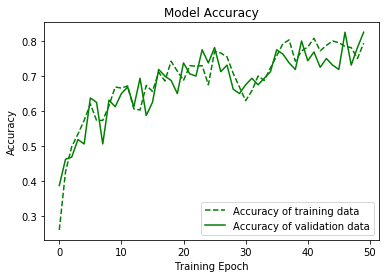

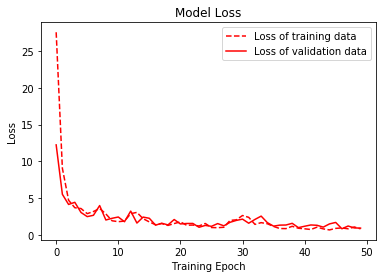

[1.4505230069160462, 0.7350000143051147]


In [7]:
num_class=10
X = df_fuzzy_color.iloc[:, 1:-1]
y = df_fuzzy_color.iloc[:, -1]

# Encoder les étiquettes (y_phog) en entiers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,stratify=y_encoded)

model = Sequential([
Dense(128,activation='relu',input_shape=[X_train.shape[1]]),
Dense(64,activation='relu'),
Dense(num_class,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train,to_categorical(y_train),epochs=50,batch_size=32,validation_split=0.2,verbose=1)

score = model.evaluate(X_test, to_categorical(y_test), verbose=1)

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)



# Convertir les probabilités en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)



# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Vraies classes')
plt.xlabel('Prédictions')
plt.title('Matrice de confusion')
plt.show()

# Évolution de la précision
plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data") 
plt.plot(history.history['val_accuracy'], "g", label="Accuracy of validation data") 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.legend()
plt.show()

# Évolution de la loss
plt.plot(history.history['loss'], "r--", label="Loss of training data") 
plt.plot(history.history['val_loss'], "r", label="Loss of validation data") 
plt.title('Model Loss') 
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.legend()
plt.show()

print(score)

#### Ajout de droupout pour limiter le sur-apprentissage

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 670us/sample - loss: 5.3091 - accuracy: 0.0969 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 2/100
640/640 [==============================] - 0s 61us/sample - loss: 2.4150 - accuracy: 0.1016 - val_loss: 2.2991 - val_accuracy: 0.1000
Epoch 3/100
640/640 [==============================] - 0s 62us/sample - loss: 2.3487 - accuracy: 0.0922 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/100
640/640 [==============================] - 0s 58us/sample - loss: 2.3246 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/100
640/640 [==============================] - 0s 52us/sample - loss: 2.3097 - accuracy: 0.1047 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 6/100
640/640 [==============================] - 0s 51us/sample - loss: 2.2997 - accuracy: 0.1125 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/100
640/640 [==============================] - 0s 50us/sample - loss:

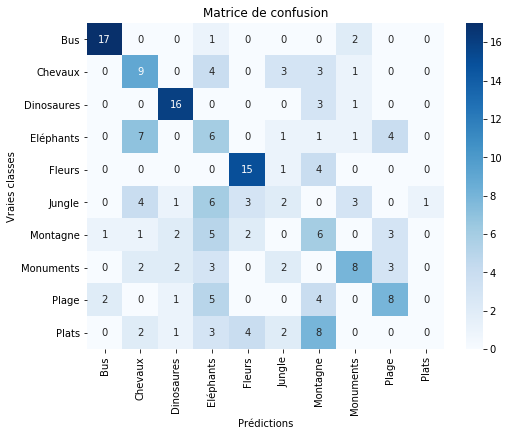

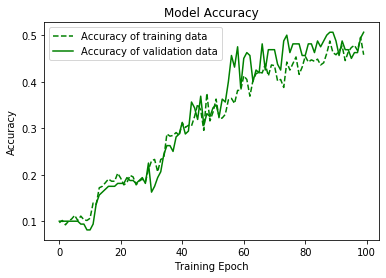

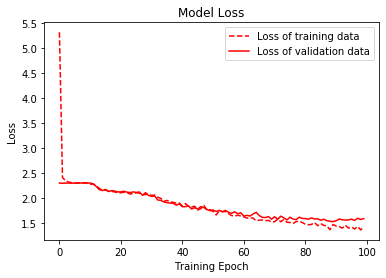

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 527us/sample - loss: 2.2554 - accuracy: 0.1531 - val_loss: 2.0979 - val_accuracy: 0.2937
Epoch 2/100
640/640 [==============================] - 0s 57us/sample - loss: 2.1004 - accuracy: 0.2734 - val_loss: 1.9865 - val_accuracy: 0.3688
Epoch 3/100
640/640 [==============================] - 0s 44us/sample - loss: 2.0169 - accuracy: 0.3125 - val_loss: 1.8937 - val_accuracy: 0.4313
Epoch 4/100
640/640 [==============================] - 0s 58us/sample - loss: 1.9055 - accuracy: 0.3625 - val_loss: 1.8043 - val_accuracy: 0.4437
Epoch 5/100
640/640 [==============================] - 0s 58us/sample - loss: 1.8511 - accuracy: 0.3844 - val_loss: 1.7162 - val_accuracy: 0.4625
Epoch 6/100
640/640 [==============================] - 0s 47us/sample - loss: 1.7448 - accuracy: 0.3812 - val_loss: 1.6330 - val_accuracy: 0.4750
Epoch 7/100
640/640 [==============================] - 0s 56us/sample - loss:

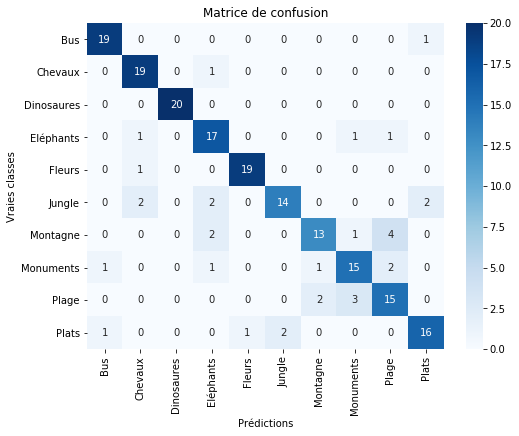

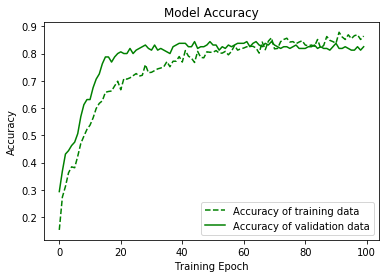

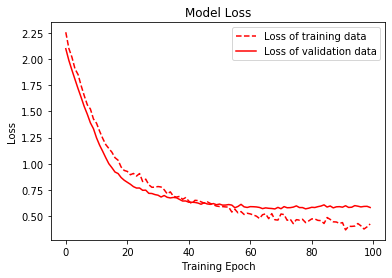

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 624us/sample - loss: 2.3444 - accuracy: 0.1344 - val_loss: 2.1847 - val_accuracy: 0.2438
Epoch 2/100
640/640 [==============================] - 0s 56us/sample - loss: 2.1575 - accuracy: 0.2297 - val_loss: 2.0525 - val_accuracy: 0.3000
Epoch 3/100
640/640 [==============================] - 0s 49us/sample - loss: 2.0348 - accuracy: 0.2594 - val_loss: 1.9305 - val_accuracy: 0.3625
Epoch 4/100
640/640 [==============================] - 0s 55us/sample - loss: 1.9365 - accuracy: 0.3000 - val_loss: 1.8255 - val_accuracy: 0.3688
Epoch 5/100
640/640 [==============================] - 0s 62us/sample - loss: 1.8370 - accuracy: 0.3063 - val_loss: 1.7275 - val_accuracy: 0.3938
Epoch 6/100
640/640 [==============================] - 0s 63us/sample - loss: 1.7222 - accuracy: 0.3797 - val_loss: 1.6424 - val_accuracy: 0.4437
Epoch 7/100
640/640 [==============================] - 0s 51us/sample - loss:

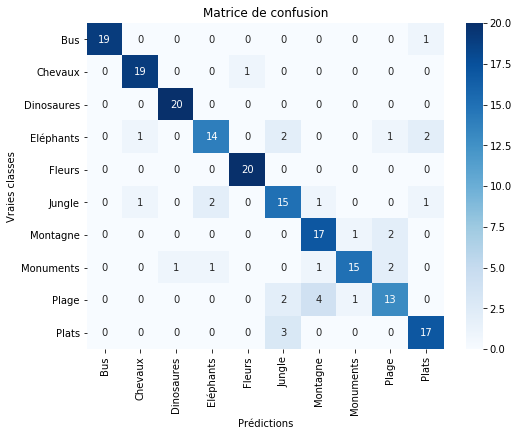

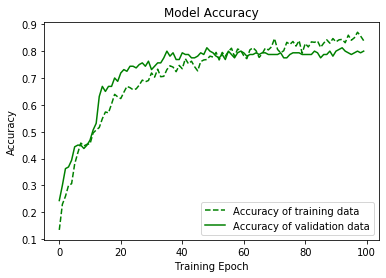

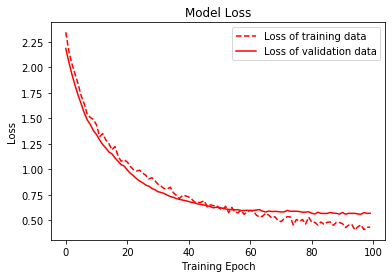

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 561us/sample - loss: 2.5134 - accuracy: 0.0703 - val_loss: 2.3149 - val_accuracy: 0.1063
Epoch 2/100
640/640 [==============================] - 0s 64us/sample - loss: 2.2892 - accuracy: 0.1406 - val_loss: 2.1809 - val_accuracy: 0.2250
Epoch 3/100
640/640 [==============================] - 0s 49us/sample - loss: 2.1782 - accuracy: 0.2188 - val_loss: 2.0780 - val_accuracy: 0.3063
Epoch 4/100
640/640 [==============================] - 0s 50us/sample - loss: 2.0876 - accuracy: 0.2625 - val_loss: 1.9715 - val_accuracy: 0.3625
Epoch 5/100
640/640 [==============================] - 0s 50us/sample - loss: 1.9932 - accuracy: 0.3156 - val_loss: 1.8676 - val_accuracy: 0.4187
Epoch 6/100
640/640 [==============================] - 0s 49us/sample - loss: 1.9286 - accuracy: 0.3187 - val_loss: 1.7590 - val_accuracy: 0.4500
Epoch 7/100
640/640 [==============================] - 0s 57us/sample - loss:

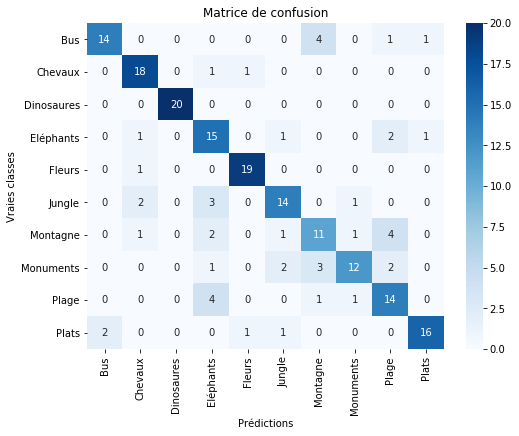

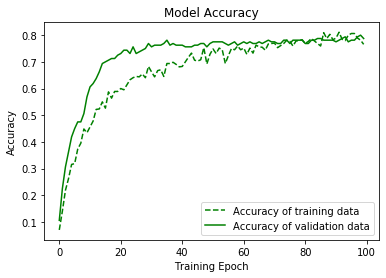

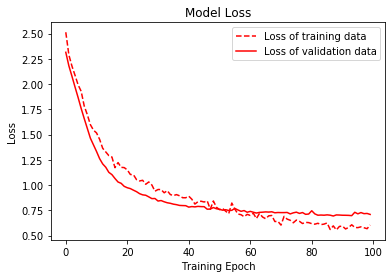

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 627us/sample - loss: 74.9850 - accuracy: 0.1234 - val_loss: 7.0879 - val_accuracy: 0.2562
Epoch 2/100
640/640 [==============================] - 0s 65us/sample - loss: 20.4863 - accuracy: 0.1406 - val_loss: 5.6282 - val_accuracy: 0.2375
Epoch 3/100
640/640 [==============================] - 0s 46us/sample - loss: 6.3025 - accuracy: 0.1719 - val_loss: 2.7150 - val_accuracy: 0.1875
Epoch 4/100
640/640 [==============================] - 0s 49us/sample - loss: 2.7895 - accuracy: 0.1547 - val_loss: 2.2191 - val_accuracy: 0.1813
Epoch 5/100
640/640 [==============================] - 0s 51us/sample - loss: 2.2943 - accuracy: 0.1484 - val_loss: 2.1302 - val_accuracy: 0.1813
Epoch 6/100
640/640 [==============================] - 0s 44us/sample - loss: 2.2150 - accuracy: 0.1672 - val_loss: 2.1120 - val_accuracy: 0.1875
Epoch 7/100
640/640 [==============================] - 0s 41us/sample - los

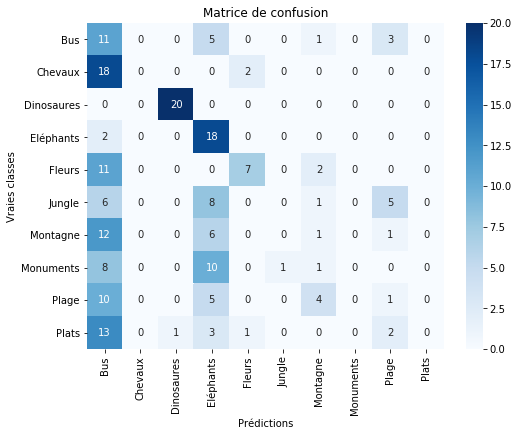

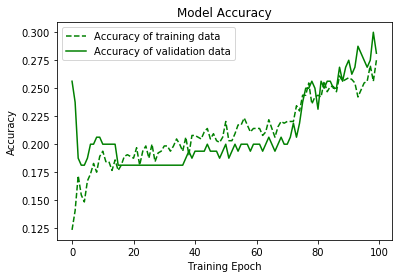

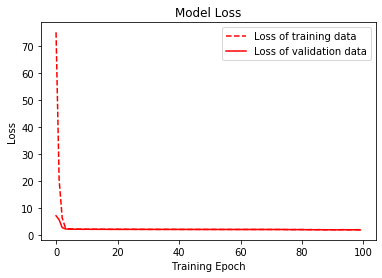

In [107]:
num_class = 10

for df in dfs:
    X = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]
    
    # Encoder les étiquettes (y_phog) en entiers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,stratify=y_encoded)

    model = Sequential([
        Dense(16,activation='relu',input_shape=[X_train.shape[1]]),
        Dropout(0.3),
        Dense(8,activation='relu'),
        Dense(num_class,activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit(X_train,to_categorical(y_train),epochs=100,batch_size=32,validation_split=0.2,verbose=1)

    score = model.evaluate(X_test, to_categorical(y_test), verbose=1)

    # Prédire les classes sur l'ensemble de test
    y_pred = model.predict(X_test)

   

    # Convertir les probabilités en classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Afficher la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Vraies classes')
    plt.xlabel('Prédictions')
    plt.title('Matrice de confusion')
    plt.show()
    
# Évolution de la précision
    plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data") 
    plt.plot(history.history['val_accuracy'], "g", label="Accuracy of validation data") 
    plt.title('Model Accuracy') 
    plt.ylabel('Accuracy')
    plt.xlabel('Training Epoch')
    plt.legend()
    plt.show()
    
    # Évolution de la loss
    plt.plot(history.history['loss'], "r--", label="Loss of training data") 
    plt.plot(history.history['val_loss'], "r", label="Loss of validation data") 
    plt.title('Model Loss') 
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.legend()
    plt.show()

#### Utilisation de l'algorithme kppv

Accuracy: 55.50%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.75      0.90      0.82        20
     Chevaux       0.52      0.80      0.63        20
  Dinosaures       0.86      0.95      0.90        20
   Eléphants       0.37      0.55      0.44        20
      Fleurs       0.73      0.55      0.63        20
      Jungle       0.44      0.20      0.28        20
    Montagne       0.50      0.20      0.29        20
   Monuments       0.44      0.60      0.51        20
       Plage       0.55      0.60      0.57        20
       Plats       0.33      0.20      0.25        20

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.53       200
weighted avg       0.55      0.56      0.53       200



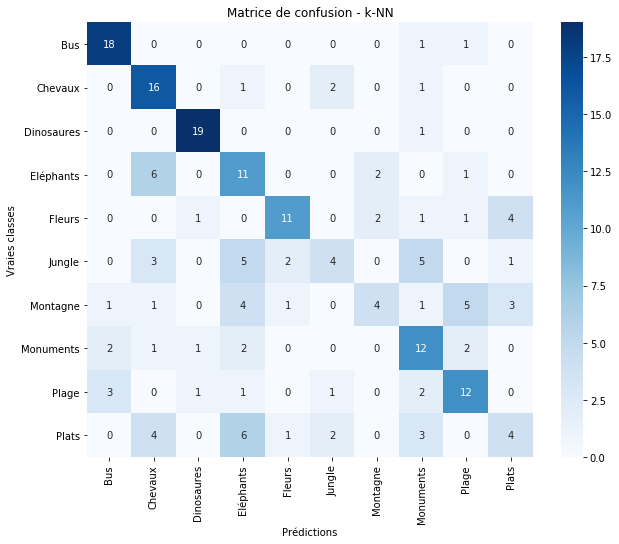

Accuracy: 85.00%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.95      0.90      0.92        20
     Chevaux       1.00      1.00      1.00        20
  Dinosaures       0.91      1.00      0.95        20
   Eléphants       0.69      0.90      0.78        20
      Fleurs       1.00      0.95      0.97        20
      Jungle       0.72      0.90      0.80        20
    Montagne       0.78      0.70      0.74        20
   Monuments       0.84      0.80      0.82        20
       Plage       0.78      0.70      0.74        20
       Plats       0.93      0.65      0.76        20

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



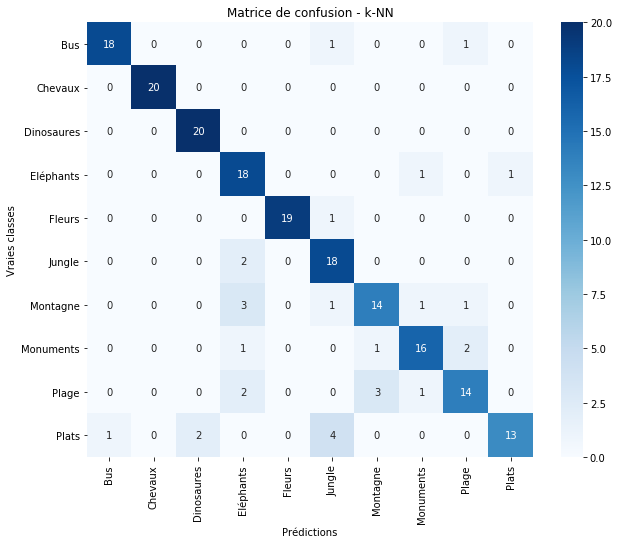

Accuracy: 84.00%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.95      0.90      0.92        20
     Chevaux       0.91      1.00      0.95        20
  Dinosaures       0.91      1.00      0.95        20
   Eléphants       0.70      0.80      0.74        20
      Fleurs       0.95      1.00      0.98        20
      Jungle       0.77      0.85      0.81        20
    Montagne       0.76      0.65      0.70        20
   Monuments       0.84      0.80      0.82        20
       Plage       0.78      0.70      0.74        20
       Plats       0.82      0.70      0.76        20

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



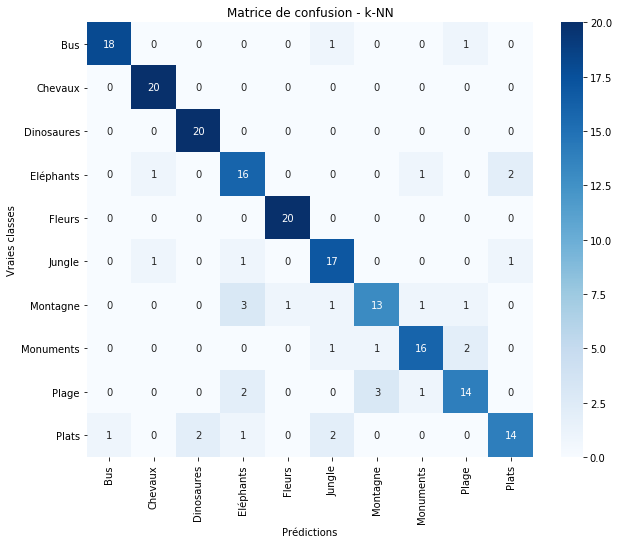

Accuracy: 79.50%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.88      0.75      0.81        20
     Chevaux       0.87      1.00      0.93        20
  Dinosaures       0.91      1.00      0.95        20
   Eléphants       0.68      0.85      0.76        20
      Fleurs       1.00      0.95      0.97        20
      Jungle       0.67      0.70      0.68        20
    Montagne       0.74      0.70      0.72        20
   Monuments       0.75      0.75      0.75        20
       Plage       0.68      0.65      0.67        20
       Plats       0.80      0.60      0.69        20

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



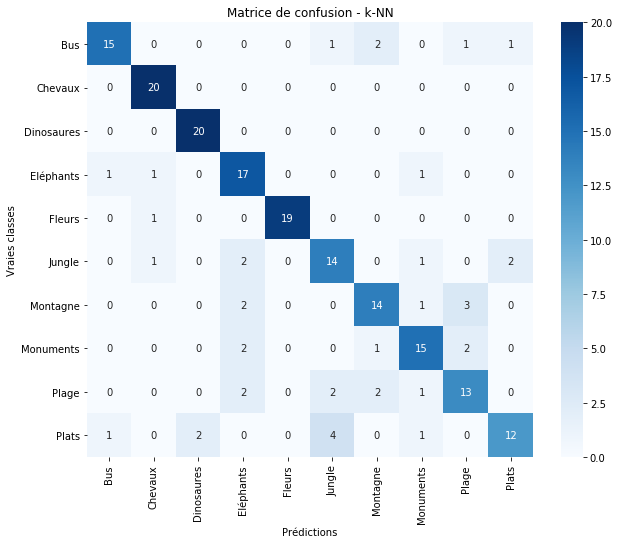

Accuracy: 72.50%

Classification Report:
              precision    recall  f1-score   support

         Bus       0.68      0.85      0.76        20
     Chevaux       0.87      1.00      0.93        20
  Dinosaures       0.95      1.00      0.98        20
   Eléphants       0.61      0.70      0.65        20
      Fleurs       0.87      0.65      0.74        20
      Jungle       0.57      0.80      0.67        20
    Montagne       0.67      0.40      0.50        20
   Monuments       0.61      0.55      0.58        20
       Plage       0.75      0.60      0.67        20
       Plats       0.74      0.70      0.72        20

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



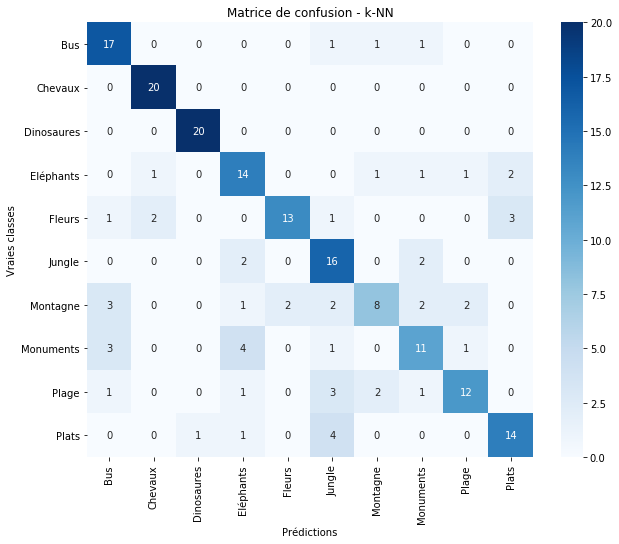

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

for df in dfs:
    X = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]

    # Encoder les étiquettes
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)



    # Division en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    # Initialisation du modèle k-NN
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2)  # p=2 pour la distance euclidienne

    # Entraînement du modèle
    knn.fit(X_train, y_train)

    # Prédictions sur le jeu de test
    y_pred = knn.predict(X_test)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Rapport de classification
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Vraies classes')
    plt.xlabel('Prédictions')
    plt.title('Matrice de confusion - k-NN')
    plt.show()



#### 2.1.3) Approche "Deep" (basée data)

In [26]:
import os
import shutil
import pathlib

classes = ["Jungle","Plage", "Monuments", "Bus", "Dinosaures", "Eléphants", "Fleurs", "Chevaux", "Montagne", "Plats"]
# Définition du dossier contenant les images
data_dir = pathlib.Path('Wang\\')
print(data_dir)
print(os.path.abspath(data_dir))

# Comptage des images
image_count = len(list(data_dir.glob('*')))
print(image_count)

# Création d'un dossier "images" qui va contenir les images
pathlib.Path("images").mkdir(parents=True, exist_ok=True)

# Copie des images dans le dossier "images" en créant des sous-dossiers pour chaque classe
cpt = 0
for i in classes:
    # Création d'un sous-dossier pour chaque classe
    from pathlib import Path
    pathlib.Path("images/"+i).mkdir(parents=True, exist_ok=True)
    # Copie des images dans chaque sous-dossier
    for j in range(100):
        original = "Wang/"+str(cpt)+".jpg"
        target = "images/"+i+"/"+str(cpt)+".jpg"
        shutil.copyfile(original, target)
        cpt+=1

Wang
c:\Users\natha\Desktop\COURS CNAM\3ème année\Analyse données non numériques\Wang
1001


#### Création du modèle

Found 1000 images belonging to 10 classes.
Train on 640 samples, validate on 160 samples
Epoch 1/20
640/640 [==============================] - 11s 18ms/sample - loss: 22.2865 - accuracy: 0.2937 - val_loss: 3.0137 - val_accuracy: 0.4437
Epoch 2/20
640/640 [==============================] - 9s 14ms/sample - loss: 1.5264 - accuracy: 0.5906 - val_loss: 0.8848 - val_accuracy: 0.6938
Epoch 3/20
640/640 [==============================] - 9s 14ms/sample - loss: 0.4772 - accuracy: 0.9031 - val_loss: 0.6992 - val_accuracy: 0.7563
Epoch 4/20
640/640 [==============================] - 9s 13ms/sample - loss: 0.1380 - accuracy: 0.9781 - val_loss: 0.6226 - val_accuracy: 0.7500
Epoch 5/20
640/640 [==============================] - 9s 14ms/sample - loss: 0.0387 - accuracy: 0.9953 - val_loss: 0.6315 - val_accuracy: 0.7625
Epoch 6/20
640/640 [==============================] - 9s 15ms/sample - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.6232 - val_accuracy: 0.7937
Epoch 7/20
640/640 [===================

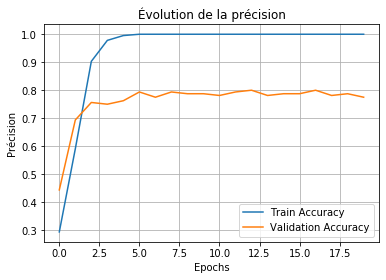

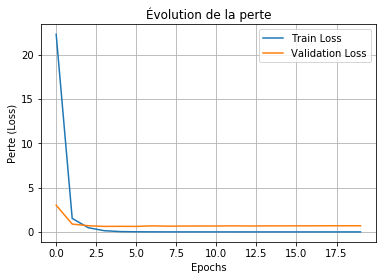

In [116]:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Chemin vers le dossier contenant les images
dataset_path = r"C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\images"

# Paramètres
img_height, img_width = 256, 256  # Dimensions des images (256x256)
num_classes = 10  # Nombre de classes

# Chargement des données et préparation
datagen = ImageDataGenerator(rescale=1.0/255)  # Normalisation des pixels

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),  # Redimensionnement à 256x256
    color_mode="rgb",  # Images en couleur (RGB)
    class_mode="categorical",  # Labels catégoriques
    batch_size=1000,  # Chargement de toutes les images
    shuffle=True
)

# Récupération des données
X, Y = next(data_generator)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Évaluation du modèle
score = model.evaluate(X_test, Y_test, verbose=1)
print("Score :", score)

# Affichage de l'historique d'entraînement
print("Historique :", history.history)

# Génération des graphiques
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Epochs')
plt.ylabel('Perte (Loss)')
plt.legend()
plt.grid()
plt.show()



#### Amélioration du modèle

Found 1000 images belonging to 10 classes.
Train on 640 samples, validate on 160 samples
Epoch 1/20
640/640 [==============================] - 24s 37ms/sample - loss: 3.4714 - accuracy: 0.1578 - val_loss: 2.1508 - val_accuracy: 0.2188
Epoch 2/20
640/640 [==============================] - 31s 49ms/sample - loss: 1.6803 - accuracy: 0.4062 - val_loss: 1.6361 - val_accuracy: 0.4750
Epoch 3/20
640/640 [==============================] - 33s 52ms/sample - loss: 1.1161 - accuracy: 0.6234 - val_loss: 0.9659 - val_accuracy: 0.6625
Epoch 4/20
640/640 [==============================] - 34s 54ms/sample - loss: 0.8391 - accuracy: 0.7047 - val_loss: 0.9666 - val_accuracy: 0.6438
Epoch 5/20
640/640 [==============================] - 34s 52ms/sample - loss: 0.6827 - accuracy: 0.7766 - val_loss: 0.8350 - val_accuracy: 0.6812
Epoch 6/20
640/640 [==============================] - 32s 51ms/sample - loss: 0.5361 - accuracy: 0.8219 - val_loss: 0.8221 - val_accuracy: 0.6812
Epoch 7/20
640/640 [===============

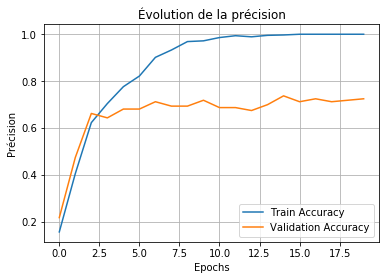

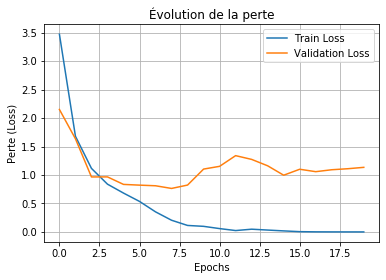

In [118]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Chemin vers le dossier contenant les images
dataset_path = r"C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\images"

# Paramètres
img_height, img_width = 256, 256  # Dimensions des images (256x256)
num_classes = 10  # Nombre de classes

# Chargement des données et préparation
datagen = ImageDataGenerator(rescale=1.0/255)  # Normalisation des pixels

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),  # Redimensionnement à 256x256
    color_mode="rgb",  # Images en couleur (RGB)
    class_mode="categorical",  # Labels catégoriques
    batch_size=1000,  # Chargement de toutes les images
    shuffle=True
)

# Récupération des données
X, Y = next(data_generator)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Évaluation du modèle
score = model.evaluate(X_test, Y_test, verbose=1)
print("Score :", score)

# Affichage de l'historique d'entraînement
print("Historique :", history.history)

# Génération des graphiques
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Epochs')
plt.ylabel('Perte (Loss)')
plt.legend()
plt.grid()
plt.show()

#### Data augmentation

Found 1000 images belonging to 10 classes.
Train on 640 samples, validate on 160 samples
Epoch 1/20
640/640 [==============================] - 25s 39ms/sample - loss: 3.3390 - accuracy: 0.1875 - val_loss: 1.7549 - val_accuracy: 0.4187
Epoch 2/20
640/640 [==============================] - 28s 44ms/sample - loss: 1.5350 - accuracy: 0.4234 - val_loss: 1.5044 - val_accuracy: 0.4688
Epoch 3/20
640/640 [==============================] - 34s 53ms/sample - loss: 1.2696 - accuracy: 0.5391 - val_loss: 1.3674 - val_accuracy: 0.4875
Epoch 4/20
640/640 [==============================] - 37s 58ms/sample - loss: 1.0396 - accuracy: 0.6375 - val_loss: 1.2775 - val_accuracy: 0.5625
Epoch 5/20
640/640 [==============================] - 39s 62ms/sample - loss: 0.8014 - accuracy: 0.7437 - val_loss: 1.2892 - val_accuracy: 0.4938
Epoch 6/20
640/640 [==============================] - 32s 51ms/sample - loss: 0.5811 - accuracy: 0.7906 - val_loss: 1.3997 - val_accuracy: 0.5312
Epoch 7/20
640/640 [===============

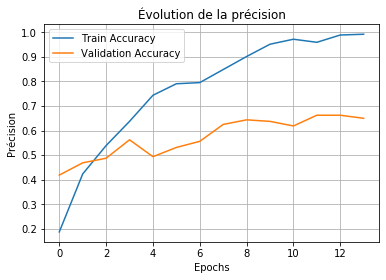

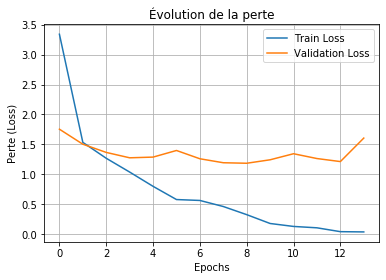

In [127]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


# Chemin vers le dossier contenant les images
dataset_path = r"C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\images"

# Paramètres
img_height, img_width = 256, 256  # Dimensions des images (256x256)
num_classes = 10  # Nombre de classes

# Chargement des données et Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),  # Redimensionnement à 256x256
    color_mode="rgb",  # Images en couleur (RGB)
    class_mode="categorical",  # Labels catégoriques
    batch_size=1000,  # Chargement de toutes les images
    shuffle=True
)

# Récupération des données
X, Y = next(data_generator)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Entraînement du modèle
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Évaluation du modèle
score = model.evaluate(X_test, Y_test, verbose=1)
print("Score :", score)

# Affichage de l'historique d'entraînement
print("Historique :", history.history)

# Génération des graphiques
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Epochs')
plt.ylabel('Perte (Loss)')
plt.legend()
plt.grid()
plt.show()

#### Transfer learning

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 7 steps
Epoch 1/15
25/25 [==============================] - 168s 7s/step - loss: 2.4955 - accuracy: 0.4837 - val_loss: 0.7207 - val_accuracy: 0.7900
Epoch 2/15
25/25 [==============================] - 185s 7s/step - loss: 0.7939 - accuracy: 0.7275 - val_loss: 0.5938 - val_accuracy: 0.8150
Epoch 3/15
25/25 [==============================] - 190s 8s/step - loss: 0.5609 - accuracy: 0.8062 - val_loss: 0.5567 - val_accuracy: 0.8300
Epoch 4/15
25/25 [==============================] - 185s 7s/step - loss: 0.5399 - accuracy: 0.8037 - val_loss: 0.4189 - val_accuracy: 0.8750
Epoch 5/15
25/25 [==============================] - 191s 8s/step - loss: 0.4310 - accuracy: 0.8425 - val_loss: 0.4444 - val_accuracy: 0.8600
Epoch 6/15
25/25 [==============================] - 189s 8s/step - loss: 0.4513 - accuracy: 0.8400 - val_loss: 0.3933 - 

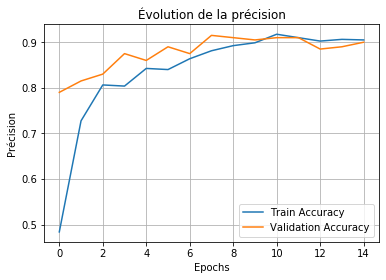

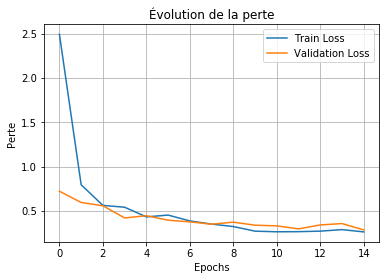

  ...
    to  
  ['...']
7/7 [==============================] - 37s 5s/step - loss: 0.3174 - accuracy: 0.8800
Validation Loss: 0.31740857660770416
Validation Accuracy: 0.8799999952316284


In [128]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Chemin vers les données
dataset_path = r"C:\\Users\\natha\\Desktop\\COURS CNAM\\3ème année\\Analyse données non numériques\\images"

# Paramètres
img_height, img_width = 256, 256
num_classes = 10  # Nombre de classes

# Data augmentation et preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Répartition entre train et validation
)

# Générateurs pour train et validation
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Chargement du modèle VGG16 pré-entraîné sur ImageNet
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))

# Geler les couches du modèle de base pour ne pas les entraîner
for layer in base_model.layers:
    layer.trainable = False

# Ajout des couches spécifiques à notre problème
model = Sequential([
    base_model,  # Modèle pré-entraîné
    Flatten(),
    Dense(256, activation='relu'),  # Couche dense avec 256 neurones
    Dropout(0.5),  # Dropout pour réduire l'overfitting
    Dense(num_classes, activation='softmax')  # Couche de sortie pour la classification
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[early_stopping],
    verbose=1
)

# Affichage des résultats
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Évolution de la précision")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Évolution de la perte")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend()
plt.grid()
plt.show()

# Évaluation finale sur l'ensemble de validation
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")
